<a href="https://colab.research.google.com/github/nurhadiyat/datmin/blob/master/Kelompok_Heni_Nurul_Kholifah%2C_Mahani_Halwa%2C_Nurhadiyatussholihah%2C_Umi_Khoiryatin_M_S_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
Mata Kuliah Data Mining
Anggota :
1. Umi Khoiryatin MS - 21120117120005
2. Mahani Halwa - 21120117140016
3. Heni Nurul Kholifah - 21120117120023
4. Nurhadiyatussholihah - 21120117120018

In [3]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 4.9MB/s 


In [5]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [6]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/YaleDataset'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/YaleDataset


In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/drive/My Drive/YaleDataset"))

# Any results you write to the current directory are saved as output.

['yaleB21', 'yaleB17', 'yaleB18', 'yaleB20', 'yaleB19', 'model.png']


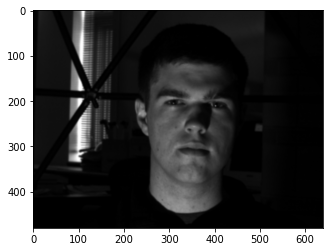

(480, 640, 3)


In [36]:
img = cv2.imread('/content/drive/My Drive/YaleDataset/yaleB20/yaleB20_P00A+020E-40.pgm')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

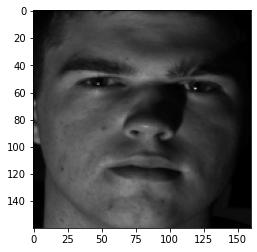

(160, 160, 3)


In [37]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('/content/drive/My Drive/YaleDataset/yaleB20/yaleB20_P00A+020E-40.pgm')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [38]:
from sklearn.datasets import load_files
import numpy as np

data_dir = '/content/drive/My Drive/YaleDataset/'

def load_dataset(path):
    data = load_files(path) #load all files from the path
    files = np.array(data['filenames']) #get the file  
    targets = np.array(data['target'])#get the the classification labels as integer index
    target_labels = np.array(data['target_names'])#get the the classification labels 
    return files,targets,target_labels

x_data, y_data,target_labels = load_dataset(data_dir)
print('Dataset size : ' , x_data.shape[0])

Dataset size :  2970


In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state = 1)

print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

x_train shape: (2376,)
y_train shape: (2376,)
x_test shape: (594,)
y_test shape: (594,)


In [40]:
import cv2
print(cv2.__version__)



4.1.2


In [41]:
def convert_image_to_array(files):
    width, height, channels = 160, 160, 3
    images_as_array = np.empty((files.shape[0], width, height, channels), dtype=np.uint8) #define train and test data shape
    for idx,file in enumerate(files):
        img = cv2.imread(file) 
        #res = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_CUBIC) #As images have different size, resizing all images to have same shape of image array
        #images_as_array[idx] = res
    return images_as_array

x_trainlen = len(x_train)
print('Training set length : ',x_trainlen)

x_testlen = len(x_test)
print('Validation set length : ',x_testlen)

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Validation set shape : ',x_test.shape)

Training set length :  2376
Validation set length :  594
Training set shape :  (2376, 160, 160, 3)
Validation set shape :  (594, 160, 160, 3)


In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [43]:
# load the facenet model
import tensorflow as tf
from tensorflow.keras.models import load_model
facenet_model = load_model('/content/drive/My Drive/keras-facenet/model/facenet_keras.h5')
print('Loaded Model')

Loaded Model


In [44]:
facenet_model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [45]:
from tensorflow.keras.utils import plot_model
plot_model(facenet_model, to_file='model.png', show_shapes=True, expand_nested=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.937996 to fit
tcmalloc: large alloc 1555259392 bytes == 0x55ec539d2000 @  0x7fd58d5ed001 0x7fd5898841fa 0x7fd5898842ad 0x7fd58aa0f6df 0x7fd58af06261 0x7fd58d383468 0x7fd58d385d53 0x55ec511f0092 0x7fd58cd38b97 0x55ec511f012a



In [47]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]
    
# convert each face in the train set into embedding
emdTrainX = list()
for face in x_train:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in x_test:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)




(2376, 128)
(594, 128)


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(y_train)
trainy_enc = out_encoder.transform(y_train)
testy_enc = out_encoder.transform(y_test)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=2376, test=594


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: train=25.421, test=19.360


Predicted: 
[0 1 2 3 4] 
[19.39364282 20.27806926 20.1371845  20.35244075 19.83866267]
Expected: 4


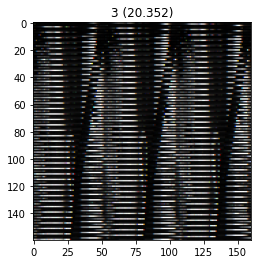

In [49]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(x_test.shape[0])])
random_face = x_test[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()